<a href="https://colab.research.google.com/github/GabrielEmidio/DataScience/blob/main/Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de dados




* Dados: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

* Curso Udemy: Ciência de Dados para Empresas e Negócios - Prof. Jones Granatyr

## Estudo de caso para Departamento de Marketing. Dados de clientes de um banco.


# Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/Ciência de Dados para Empresas e Negócios/Departamento de Marketing/CC GENERAL.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


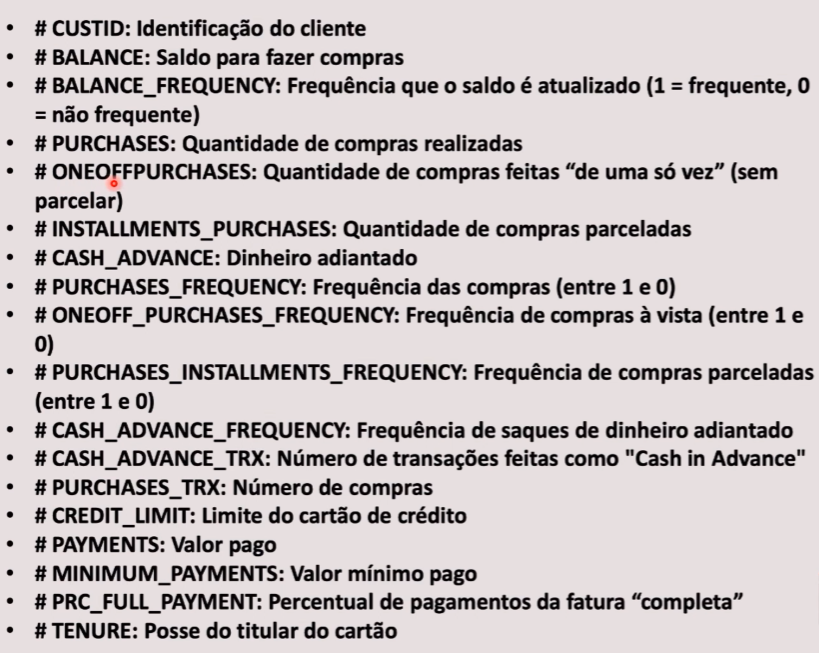

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

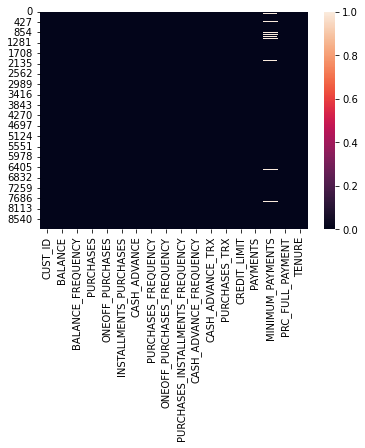

In [10]:
sns.heatmap(creditcard_df.isnull());

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [13]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [14]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [16]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

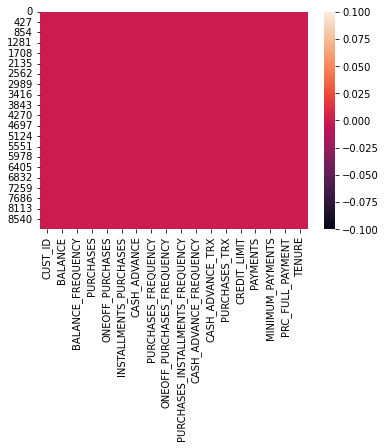

In [17]:
sns.heatmap(creditcard_df.isnull());

In [18]:
creditcard_df.duplicated().sum()

0

In [19]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [20]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

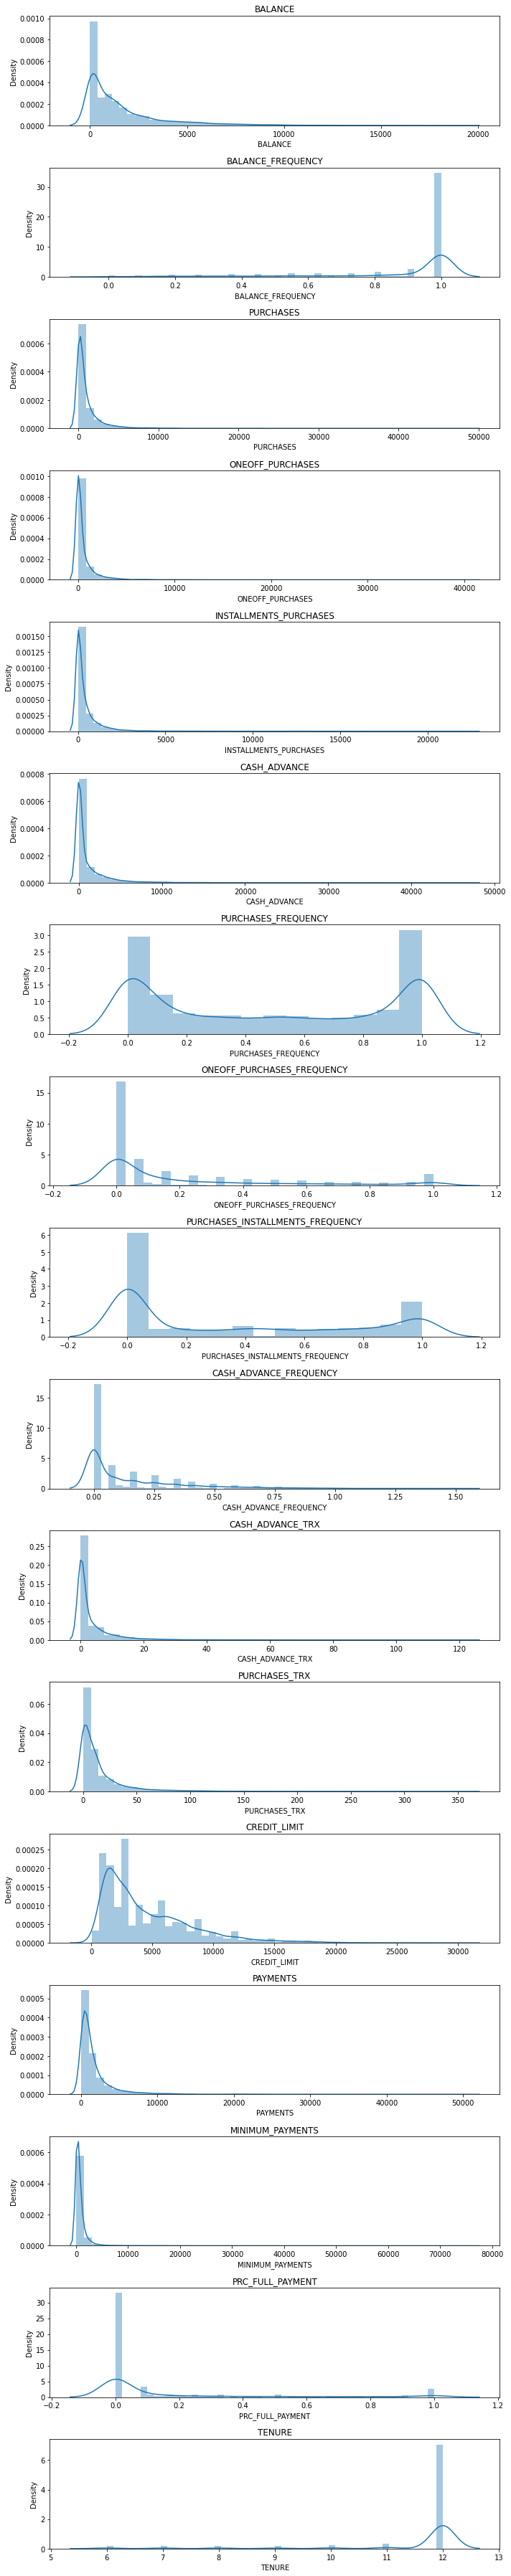

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [23]:
correlations = creditcard_df.corr()

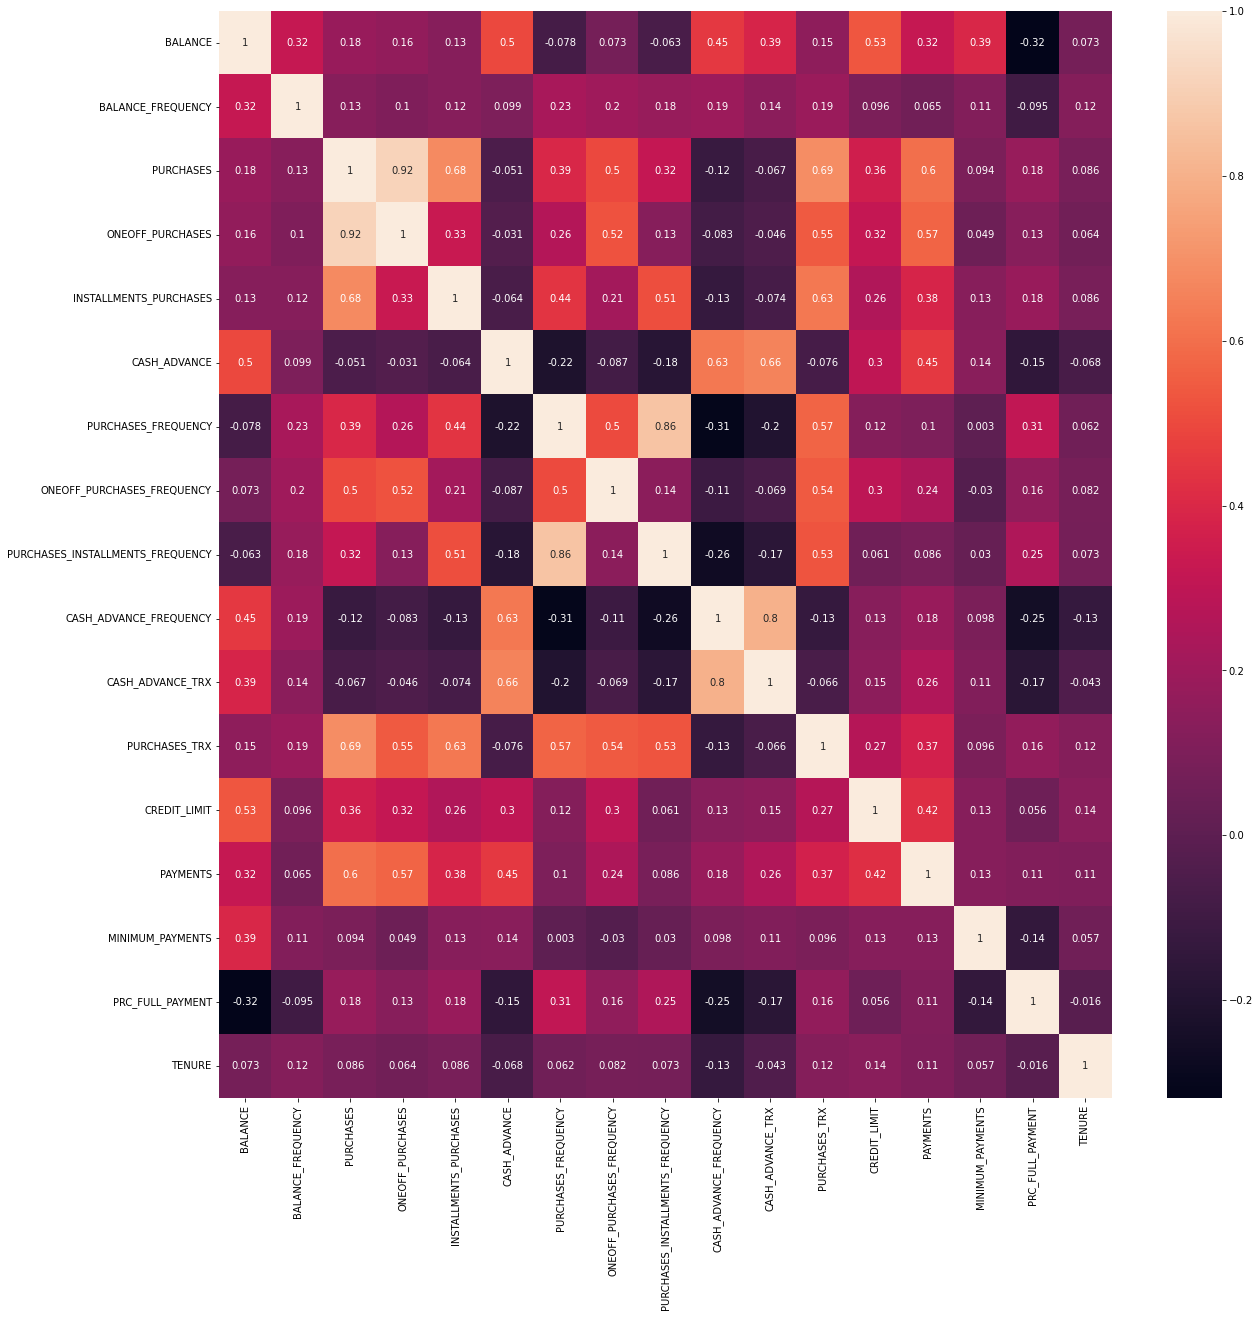

In [24]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

## Definição do número de clusters usando o Elbow Method

In [25]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [26]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [27]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [28]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [29]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [30]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [31]:
print(wcss_1)

[152149.99999999983, 127784.97295116563, 111986.69806610125, 99073.93826774803, 91502.92043249564, 84852.59400226288, 79532.32854113297, 74491.30602873291, 69954.73945587422, 66478.9706294894, 63633.16205449488, 61402.207160727216, 59162.64579722444, 57462.31684445565, 55821.587869762894, 54615.11418452071, 53196.715760035346, 51943.823006078295, 50798.12524948691]


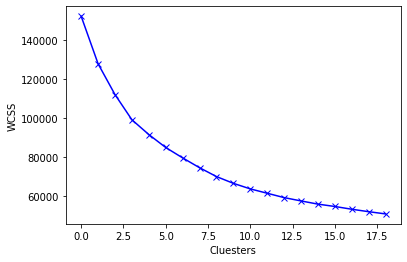

In [32]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Cluesters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [34]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [36]:
labels, len(labels)

(array([3, 2, 6, ..., 5, 5, 5], dtype=int32), 8950)

In [37]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([ 360, 2026,  871, 2751, 1183,  623, 1112,   24]))

In [39]:
kmeans.cluster_centers_

array([[ 1.05636224e+00,  4.65743326e-01,  2.46985526e+00,
         1.77297787e+00,  2.58266309e+00, -1.54553119e-01,
         1.16625725e+00,  1.52872461e+00,  1.27721955e+00,
        -2.81016595e-01, -1.50841490e-01,  3.09003982e+00,
         1.28589335e+00,  1.42249702e+00,  7.40278947e-01,
         2.42506812e-01,  3.37847175e-01],
       [-3.64490370e-01,  3.32872593e-01, -3.60627921e-02,
        -2.40787557e-01,  3.56910597e-01, -3.64115055e-01,
         9.88314050e-01, -3.79840951e-01,  1.19872604e+00,
        -4.74444816e-01, -3.60547175e-01,  1.87465014e-01,
        -2.58232482e-01, -2.15762626e-01, -5.29637678e-02,
         3.10428607e-01,  2.56721964e-01],
       [ 1.68083703e+00,  3.92297441e-01, -2.17515218e-01,
        -1.54466232e-01, -2.30596730e-01,  2.01603062e+00,
        -4.73061444e-01, -2.06557779e-01, -4.15005832e-01,
         1.91917883e+00,  1.92722017e+00, -2.65880668e-01,
         1.02710106e+00,  8.23608252e-01,  5.08092359e-01,
        -3.89790188e-01,  6.9

In [40]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.056362,0.465743,2.469855,1.772978,2.582663,-0.154553,1.166257,1.528725,1.277220,-0.281017,-0.150841,3.090040,1.285893,1.422497,0.740279,0.242507,0.337847
1,-0.364490,0.332873,-0.036063,-0.240788,0.356911,-0.364115,0.988314,-0.379841,1.198726,-0.474445,-0.360547,0.187465,-0.258232,-0.215763,-0.052964,0.310429,0.256722
2,1.680837,0.392297,-0.217515,-0.154466,-0.230597,2.016031,-0.473061,-0.206558,-0.415006,1.919179,1.927220,-0.265881,1.027101,0.823608,0.508092,-0.389790,0.069847
3,0.015164,0.403919,-0.356695,-0.240784,-0.400926,-0.094503,-0.854184,-0.393104,-0.756914,0.103999,-0.027833,-0.481441,-0.302276,-0.249895,-0.005670,-0.455232,0.273216
4,-0.701258,-2.140285,-0.310336,-0.234722,-0.302444,-0.322272,-0.554827,-0.441460,-0.440553,-0.521236,-0.376356,-0.419376,-0.176011,-0.202115,-0.256800,0.283165,0.198977
5,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
6,-0.137193,0.400478,0.545488,0.675152,0.049243,-0.332659,0.986248,1.917043,0.174094,-0.414403,-0.332304,0.622712,0.432503,0.145823,-0.159018,0.451951,0.268535
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [42]:
# Criando o processo inverso da padronização

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns= [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3763.203668,0.987601,6280.088667,3535.217500,2746.537833,654.766002,0.958426,0.658506,0.872037,0.078910,2.219444,91.516667,9173.055556,5851.133351,2589.395401,0.224644,11.969444
1,805.818890,0.956125,926.156122,192.779344,733.817469,215.304832,0.887009,0.089144,0.840842,0.040203,0.788357,19.369512,3554.894032,1108.532190,740.776716,0.244510,11.860878
2,5062.995227,0.970202,538.480218,336.055063,202.541883,5206.581502,0.300488,0.140837,0.199503,0.519191,16.400689,8.101033,8231.463313,4117.409041,2048.294351,0.039708,11.610792
3,1596.036531,0.972955,241.119909,192.784900,48.514900,780.694710,0.147525,0.085187,0.063620,0.155955,3.058888,2.743003,3394.644372,1009.722399,850.993887,0.020567,11.882952
4,104.865352,0.370257,340.166450,202.846306,137.571031,303.051343,0.267672,0.070762,0.189350,0.030840,0.680473,4.285714,3854.048558,1148.040394,265.744196,0.236535,11.783601
5,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
6,1278.918522,0.972140,2168.648767,1713.051323,455.597444,281.269985,0.886180,0.774349,0.433627,0.052218,0.981098,30.188119,6068.071353,2155.287930,493.622500,0.285902,11.876688
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


In [45]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


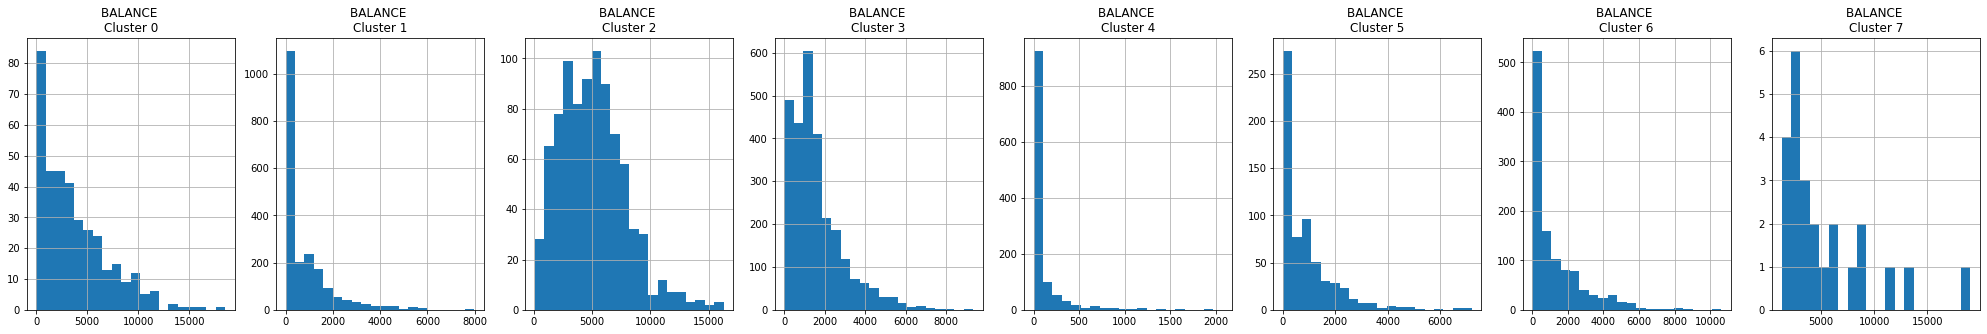

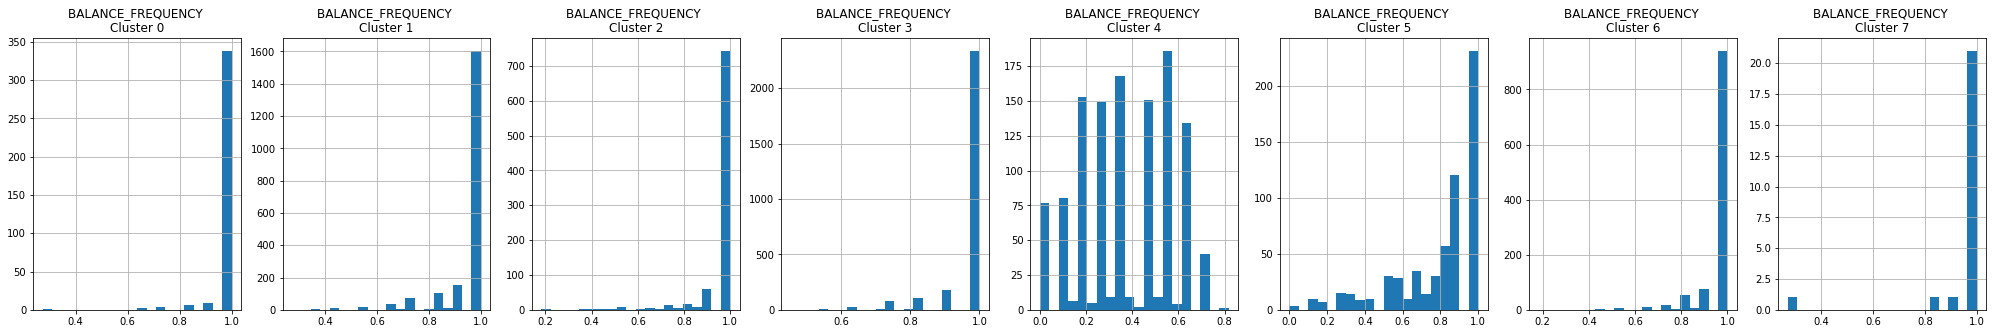

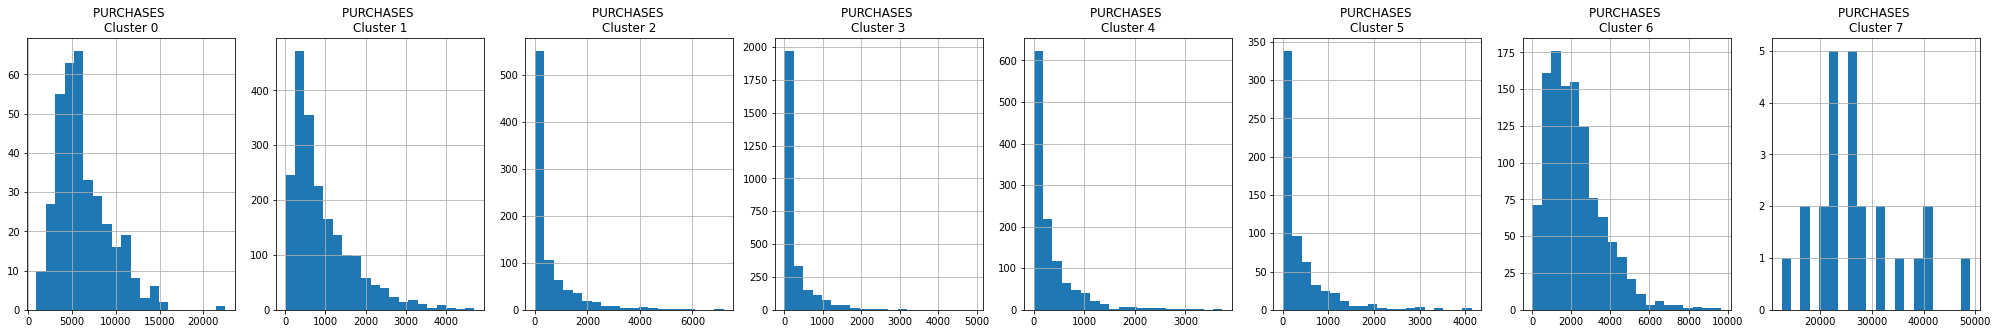

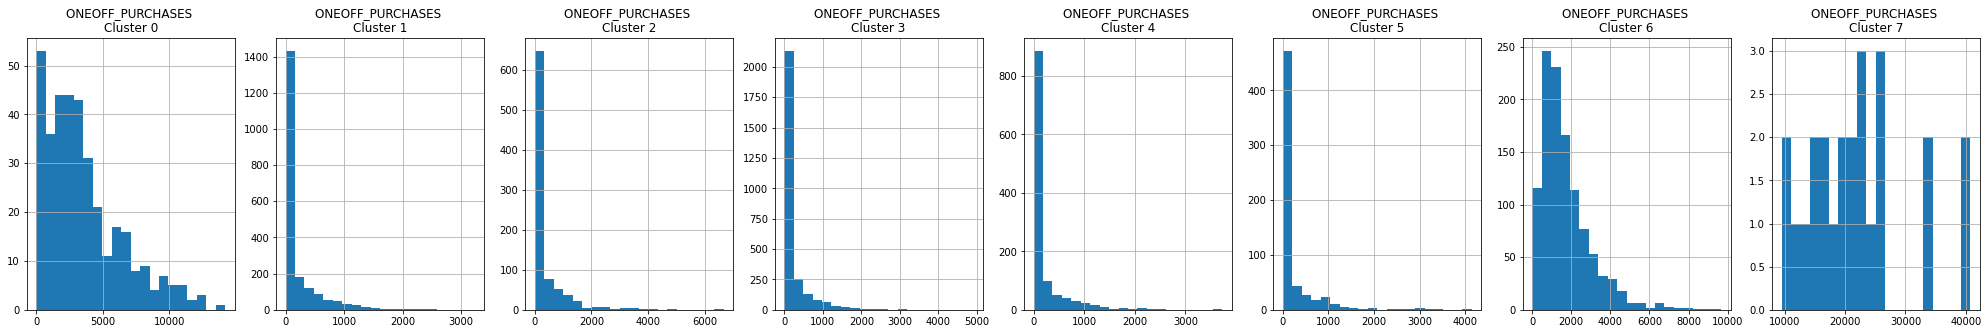

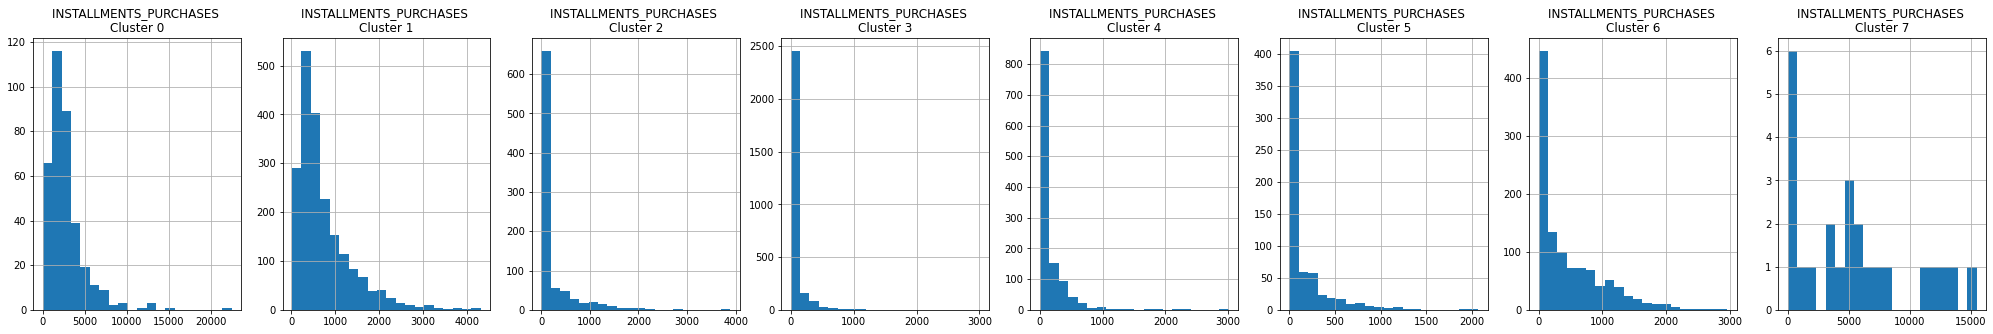

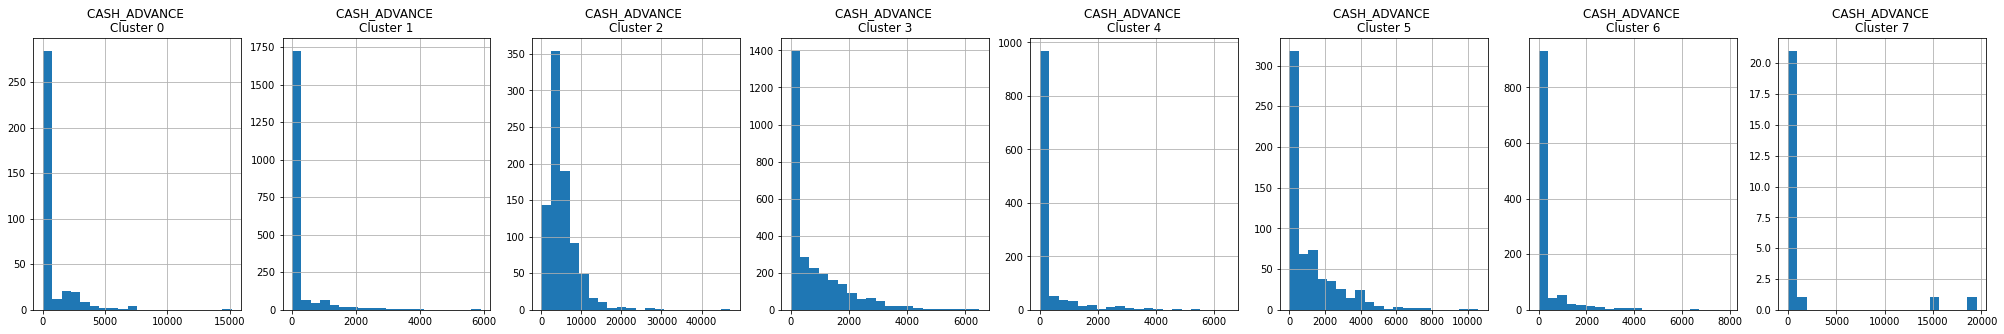

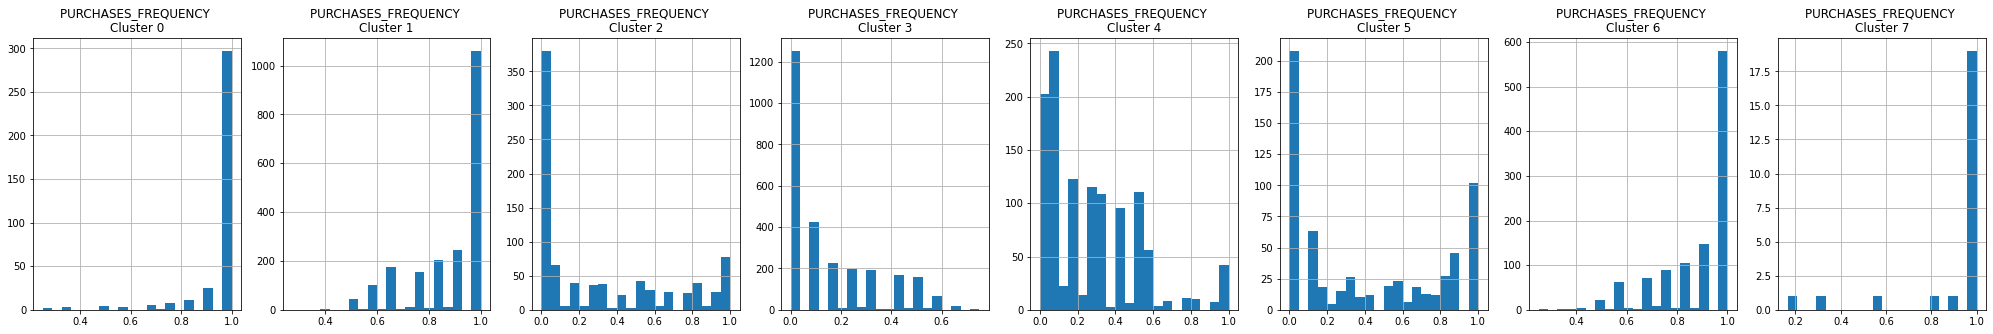

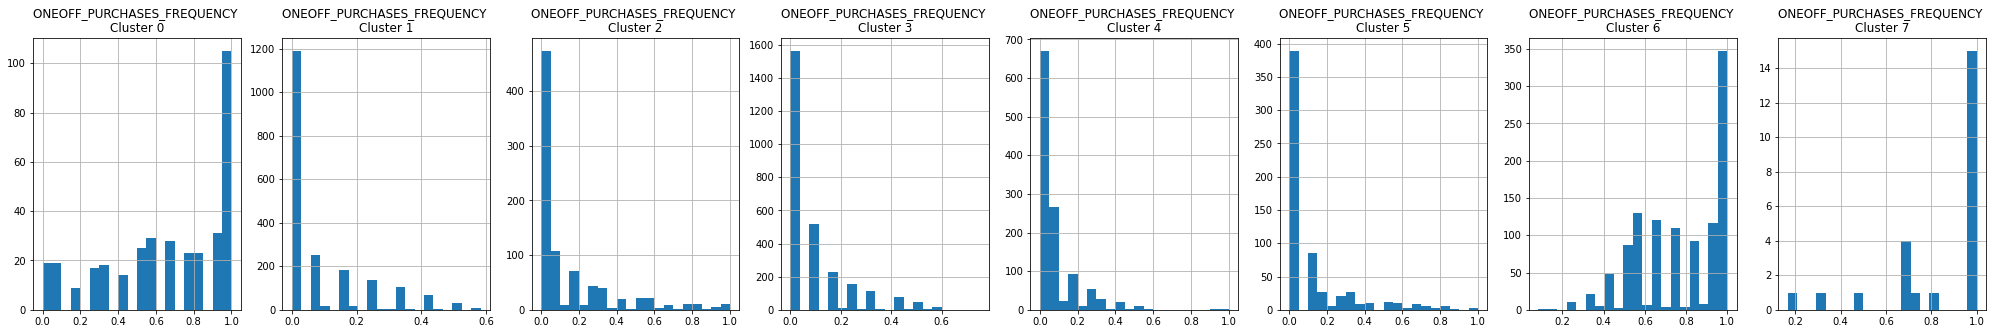

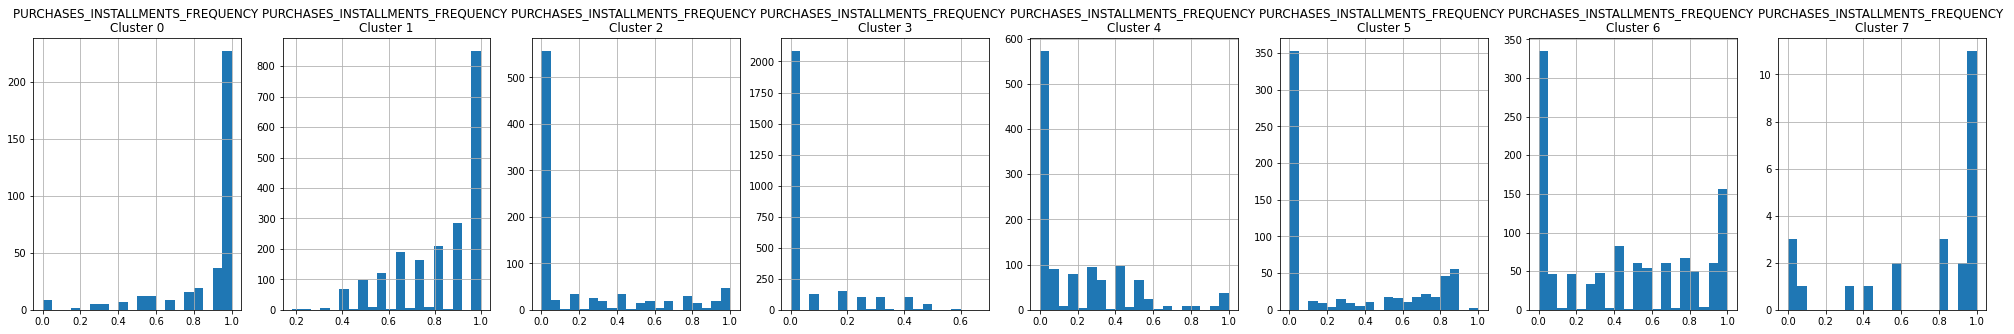

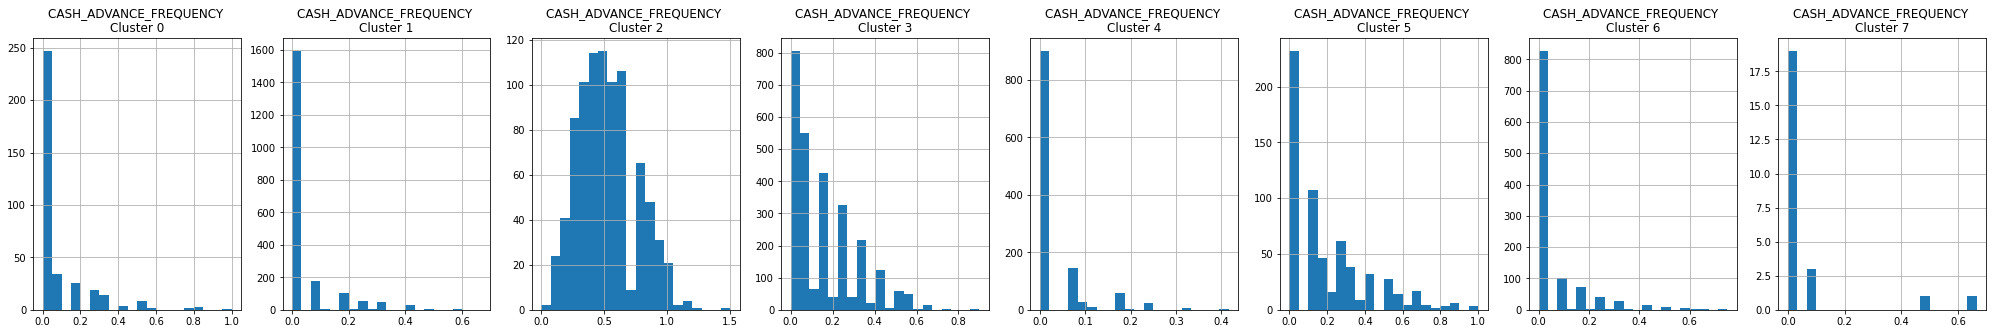

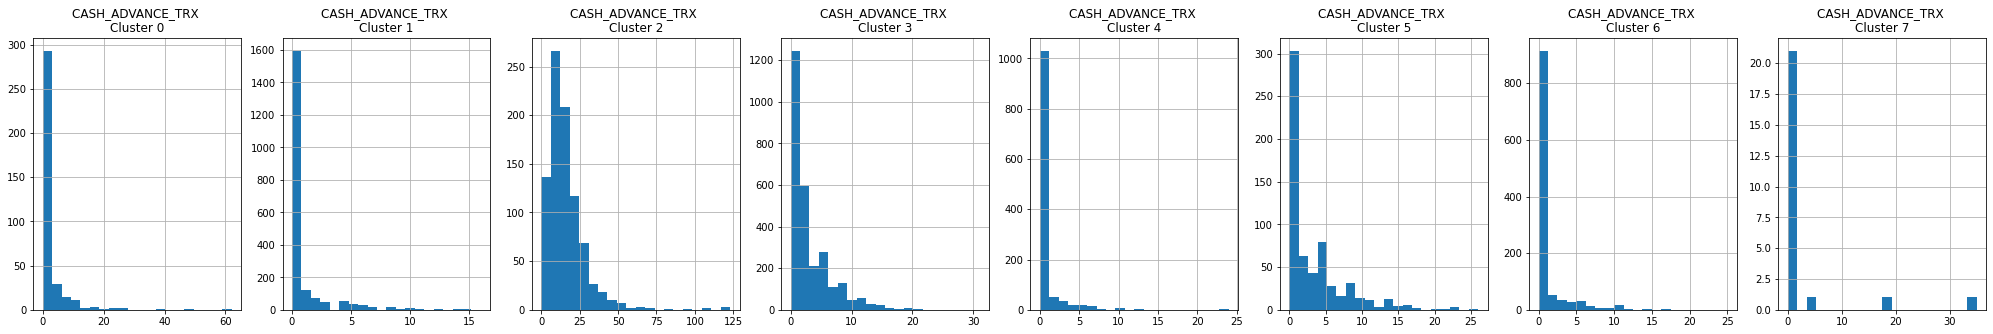

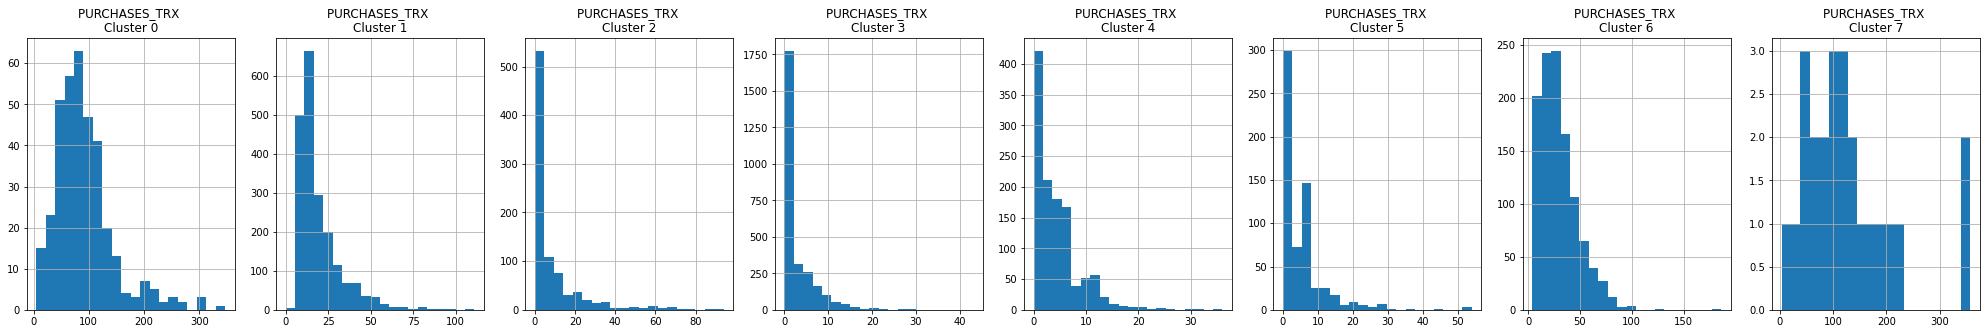

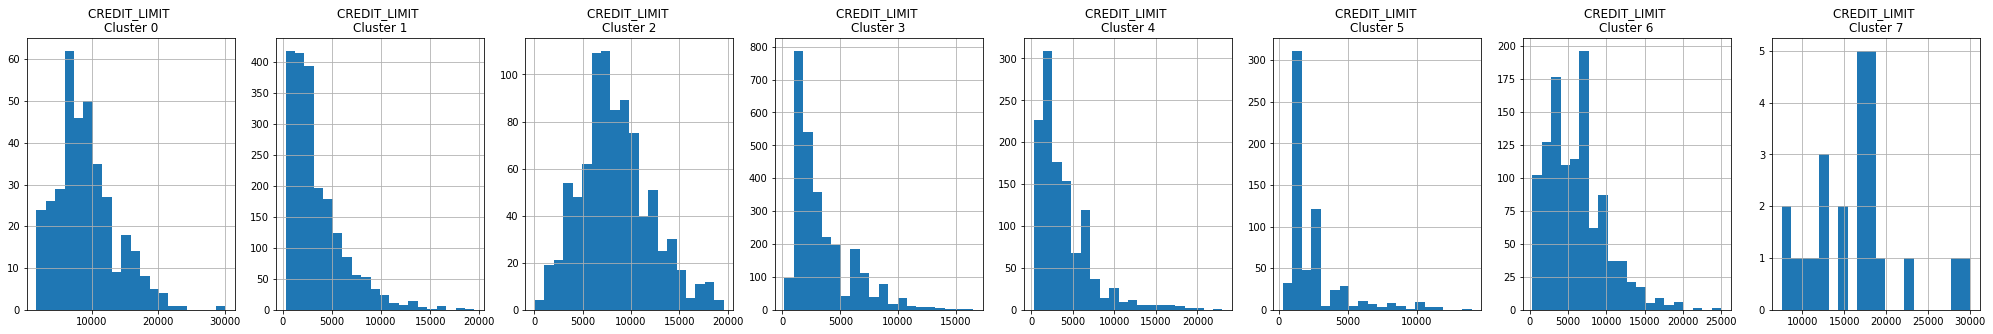

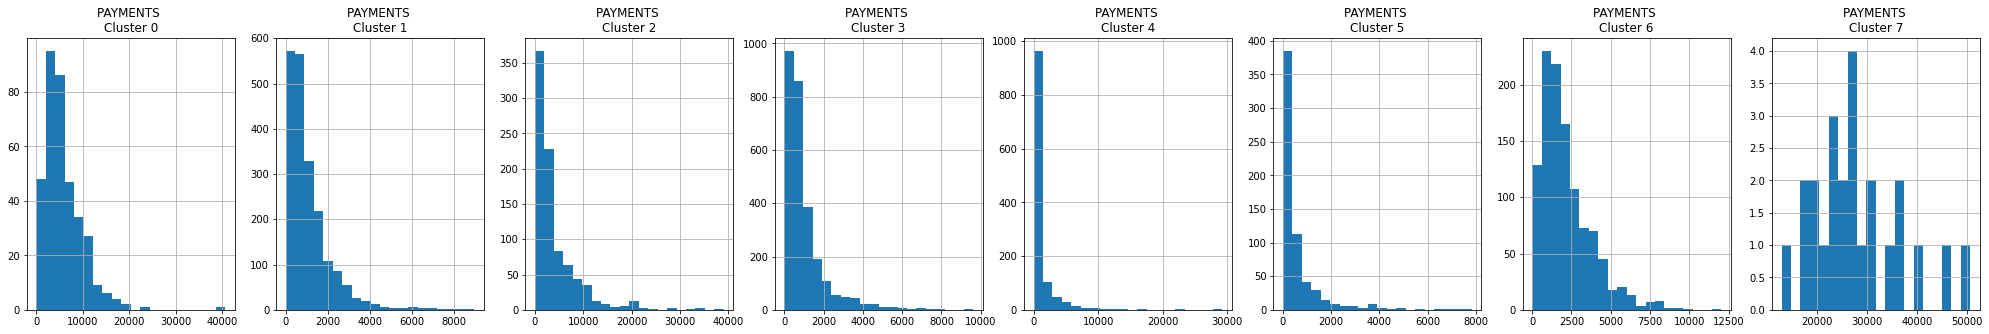

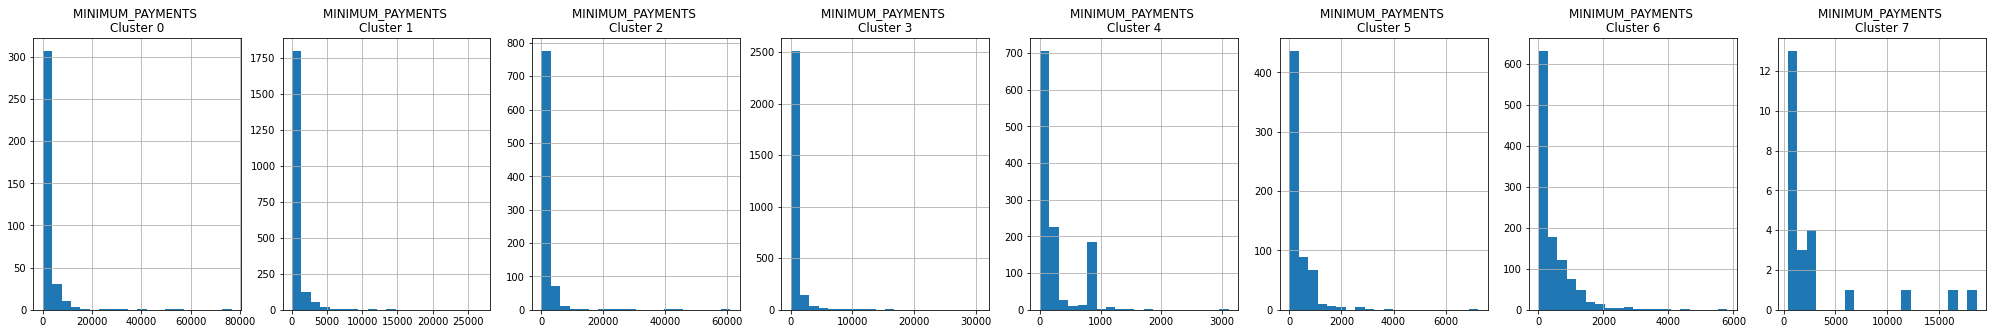

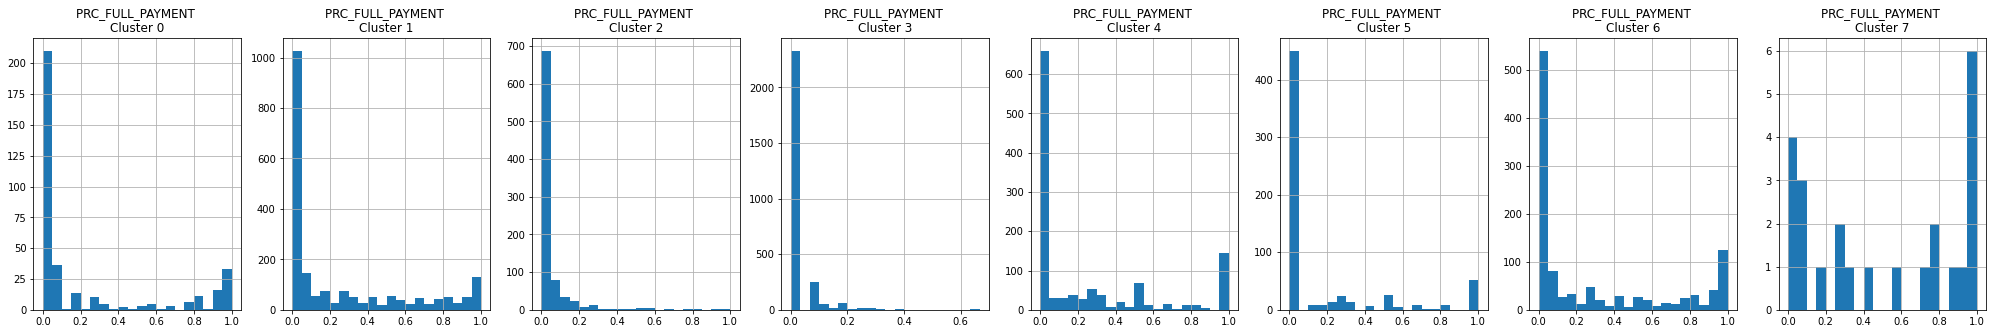

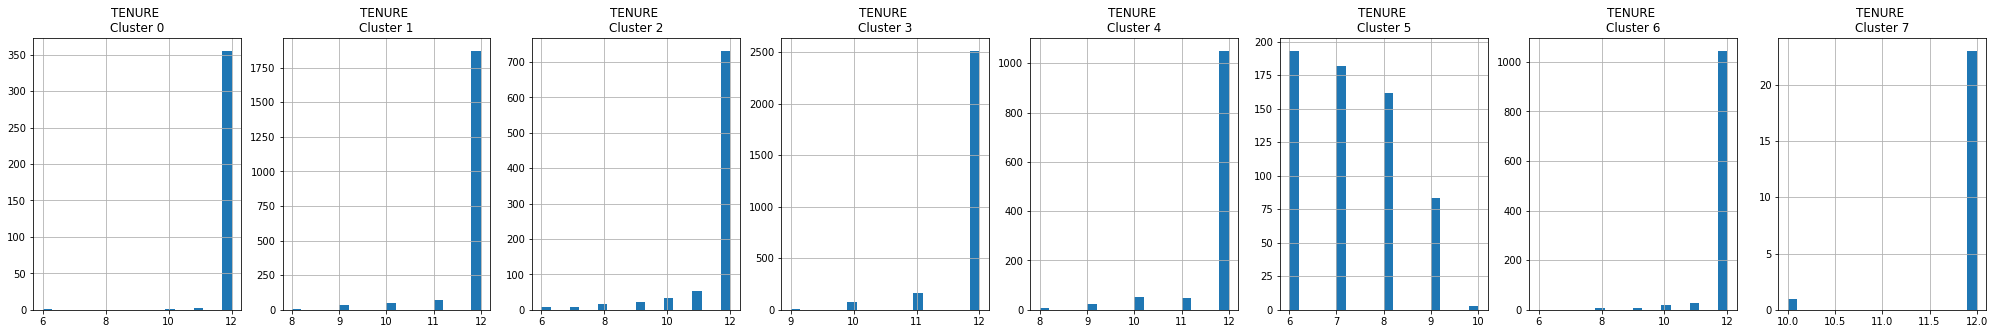

In [47]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title(f'{i} \nCluster {j}')
  plt.show()

In [48]:
credit_ordered = creditcard_df_cluster.sort_values(by= 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3510,10124.472140,1.000000,4795.49,2006.02,2789.47,0.000000,1.000000,0.666667,1.000000,0.000000,0,87,15000.0,2552.784306,2780.902332,0.000000,12,0
4299,4988.093733,1.000000,8581.29,4640.84,3940.45,225.473003,1.000000,0.666667,1.000000,0.083333,1,94,10500.0,1571.883000,1133.733957,0.000000,12,0
7847,2030.838228,1.000000,3165.54,1591.65,1573.89,0.000000,1.000000,0.583333,1.000000,0.000000,0,151,6000.0,1872.134044,438.771190,0.000000,12,0
1709,1917.441126,0.909091,12617.19,76.19,12541.00,0.000000,0.333333,0.166667,0.166667,0.000000,0,5,15000.0,13733.557830,336.823302,0.428571,12,0
5212,470.593325,1.000000,6743.31,6182.78,560.53,0.000000,1.000000,1.000000,0.666667,0.000000,0,122,3200.0,4369.008441,222.118023,0.666667,12,0


In [49]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4220,1268.809031,0.272727,17945.00,17945.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,18000.0,50721.48336,1149.747342,0.000000,12,7
5358,6372.182817,1.000000,22101.78,22101.78,0.00,19513.474830,0.333333,0.333333,0.000000,0.666667,35,40,7500.0,39461.96580,6764.853481,0.250000,12,7
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.000000,1.000000,1.000000,0.583333,0.000000,0,56,17000.0,17575.20083,2465.465414,0.166667,12,7
1641,3454.094319,1.000000,31299.35,19064.30,12235.05,0.000000,1.000000,0.666667,0.833333,0.000000,0,121,7500.0,22542.58705,1193.031030,0.583333,12,7
3698,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.82354,569.401398,0.727273,12,7


In [50]:
credit_ordered.to_csv('cluster.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [51]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222108, -1.07645677],
       [-1.13829801,  2.50645834],
       [ 0.96968109, -0.38347349],
       ...,
       [-0.92620329, -1.81078514],
       [-2.33654926, -0.65798035],
       [-0.55642015, -0.40045101]])

In [52]:
pca_df = pd.DataFrame(data= principal_comp, columns= ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076457
1,-1.138298,2.506458
2,0.969681,-0.383473
3,-0.873630,0.043155
4,-1.599434,-0.688584


In [53]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076457,3
1,-1.138298,2.506458,2
2,0.969681,-0.383473,6
3,-0.873630,0.043155,3
4,-1.599434,-0.688584,3


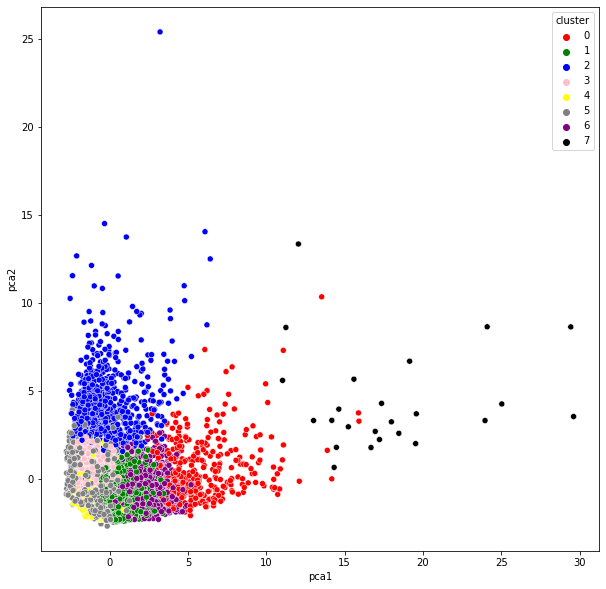

In [57]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette= ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

In [58]:
# Reduzir 18 atributos para 10
# Elbow
# K-means
# PCA

In [59]:
creditcard_df_scaled.shape

(8950, 17)

In [62]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [63]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [64]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [65]:
# encoder
encoder = Model(input_df, encoded)

In [66]:
autoencoder.compile(optimizer='Adam', loss='mean_squared_error')

In [67]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 7s 21ms/step - loss: 0.1813
Epoch 2/50
280/280 [==============================] - 6s 23ms/step - loss: 0.0734
Epoch 3/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0616
Epoch 4/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0323
Epoch 5/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0454
Epoch 6/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0320
Epoch 7/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0218
Epoch 8/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0688
Epoch 9/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0369
Epoch 10/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0268
Epoch 11/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0319
Epoch 12/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0196
Epoch 13/50
2

In [68]:
creditcard_df_scaled.shape

(8950, 17)

In [69]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 6ms/step


In [70]:
compact.shape

(8950, 10)

In [71]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [72]:
compact[0]

array([0.53583175, 0.87244517, 0.097216  , 0.564283  , 1.9312488 ,
       0.        , 0.7245257 , 0.38223445, 1.0789638 , 0.44460922],
      dtype=float32)

In [73]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

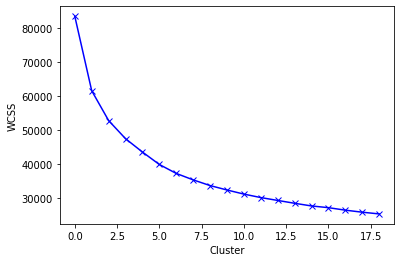

In [74]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS')

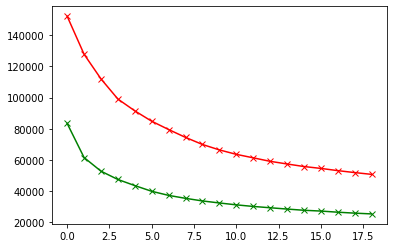

In [75]:
plt.plot(wcss_1, 'bx-', color='r')
plt.plot(wcss_2, 'bx-', color='g')

In [77]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [78]:
labels = kmeans.labels_
labels, labels.shape

(array([3, 3, 0, ..., 3, 3, 3], dtype=int32), (8950,))

In [80]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [82]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.033609,-0.249603
1,1.759856,-1.271622
2,-1.184733,0.493935
3,0.388538,-0.188474
4,-1.064735,-0.189746


In [86]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.033609,-0.249603,3
1,1.759856,-1.271622,3
2,-1.184733,0.493935,0
3,0.388538,-0.188474,3
4,-1.064735,-0.189746,0


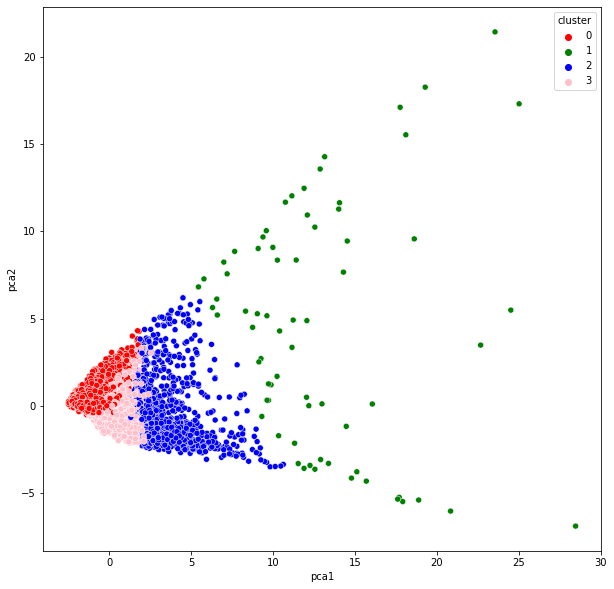

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette= ['red', 'green', 'blue', 'pink'])

In [90]:
df_cluster_ordered = df_cluster_at.sort_values(by='cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6470,1396.625608,1.0,1163.49,639.37,524.12,1131.376682,0.916667,0.416667,0.666667,0.166667,7,20,1900.0,607.122812,945.876518,0.000000,12,0
7630,45.905486,1.0,398.40,0.00,398.40,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,403.594309,171.920660,0.916667,12,0
5911,636.206720,1.0,1514.80,1514.80,0.00,0.000000,0.500000,0.500000,0.000000,0.000000,0,9,1500.0,1340.645745,309.272904,0.000000,12,0
3527,3822.394483,1.0,2239.10,1789.70,449.40,0.000000,1.000000,1.000000,0.666667,0.000000,0,39,5300.0,944.210110,919.346978,0.000000,12,0
3526,2077.343786,1.0,479.94,195.00,284.94,344.256221,0.750000,0.250000,0.666667,0.166667,4,13,2500.0,619.598735,576.194268,0.000000,12,0


In [91]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4361,1096.994956,1.000000,0.00,0.00,0.0,1148.512914,0.000000,0.000000,0.0,0.166667,4,0,2500.0,160.482027,404.435634,0.0,12,3
4359,1052.799075,1.000000,0.00,0.00,0.0,1523.162883,0.000000,0.000000,0.0,0.333333,8,0,1500.0,1696.073522,351.642621,0.0,12,3
4357,2083.900081,1.000000,0.00,0.00,0.0,1116.430456,0.000000,0.000000,0.0,0.166667,6,0,5500.0,465.698012,602.277885,0.0,12,3
4384,2679.811246,1.000000,0.00,0.00,0.0,154.629617,0.000000,0.000000,0.0,0.083333,1,0,3000.0,713.179379,1013.177624,0.0,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,3


In [92]:
df_cluster_ordered.to_excel('cluster_ordered.xlsx')